# Crime Rates

#### Here, we are determining which neighborhood is the safest neighborhood to raise a child. To determine this we are going to look at a data set that contains all the arrests in Pittsburgh and which neighborhood they correspond to. In addition, we are going to look at which individual arrests would be of greater threat to children.

In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

We import the data and display the first ten rows.

In [124]:
data = pd.read_csv("PittsburghPoliceArrestData.csv")

# look at the first ten rows of the data
data.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Let's get a sum for each neighborhood of the amount of crimes that occured in them. Each row is one crime committed in a particular neighborhood. Therefore, if we count the number of rows that have a certain incident neighborhood, then we get the total crimes committed in that neighborhood. Then we can put the number of incidents and the neighborhoods they occured in (the index column) into a data frame.

In [125]:
data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = pd.DataFrame() 
crime["incidents"] = data['INCIDENTNEIGHBORHOOD'].value_counts()
crime = crime.reset_index()
crime

,index,incidents
0,Central Business District,3312
1,South Side Flats,2840
2,Carrick,1957
3,East Allegheny,1770
4,Homewood South,1740
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


Let's plot this data!

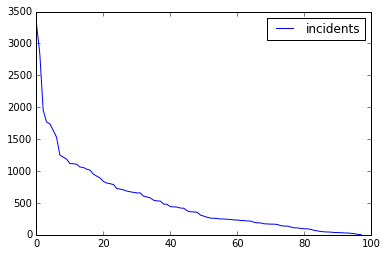

In [126]:
crime.plot()

Ew! The axis is hard to read! Let's make a bar graph instead of the original data!

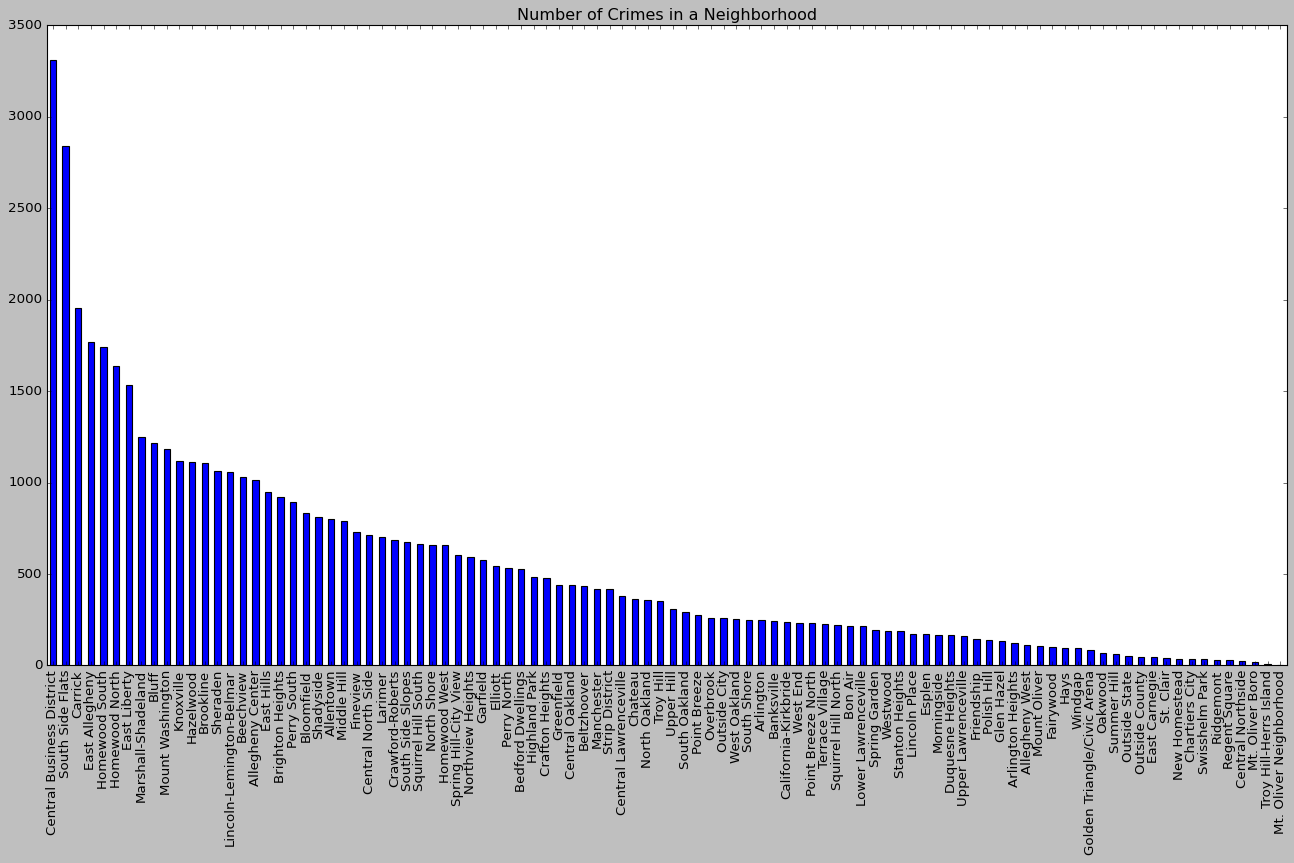

In [127]:
plt.style.use('classic')
data['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar(title='Number of Crimes in a Neighborhood', figsize=(20,10))

This is a headache inducing bar graph, but it is legable. The neighborhoods with the most crime recorded was the Central Business District, South Side Flats, Carrick, East Allegheny, and Homewood South.
Now, let's try plotting this on a map.

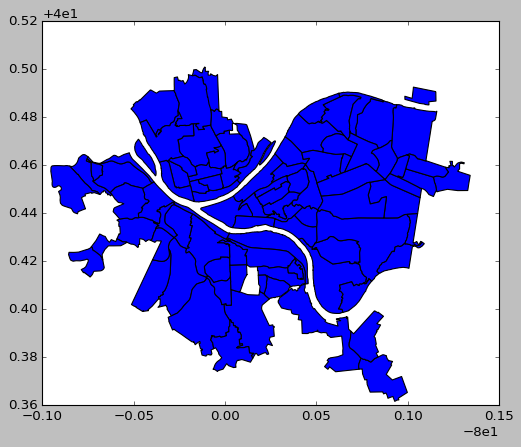

In [128]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() # plot the geopandas dataframe


In [129]:
# do the merge
hood = neighborhoods.merge(crime, how='left', left_on='hood', right_on="index")
# look at the head to confirm it merged correctly
hood = hood.dropna()
hood[['hood',"incidents",'geometry']].head()

,hood,incidents,geometry
0,Central Oakland,438.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,358.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,255.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,685.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,416.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


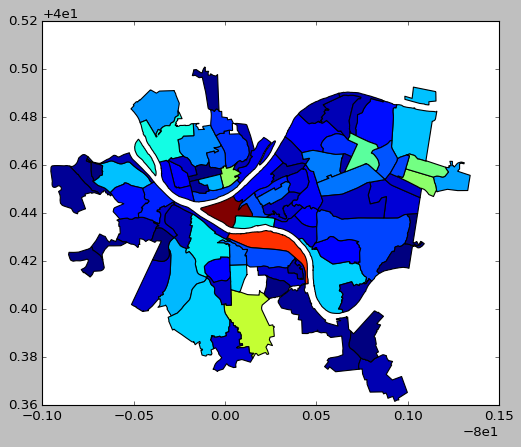

In [130]:
hood.plot(column="incidents")

We can improve this graph by adding a legend!

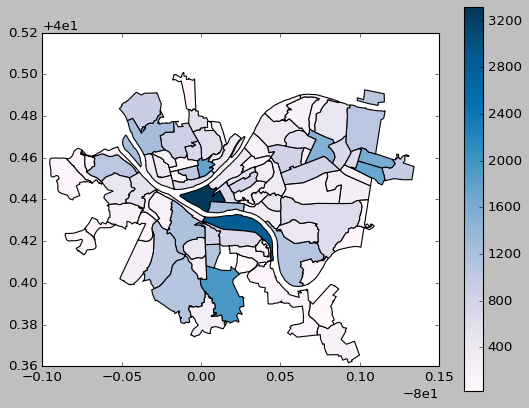

In [131]:
hood.plot(column='incidents', # set the data to be used for coloring
               cmap='PuBu', 
          legend= True# choose a color palette
 # set disctricts with no data to gray
               )

Above we can see where the most crime is present, but not all of this crime is a threat to children, so lets narrow the data set down to only crimes related to 'assault', 'child', and 'minor'

In [132]:
# Warning, this cell takes forever to run because the data set is massive
child_data = data

for index, row in data.iterrows():
    crime = str(row["OFFENSES"])

    if "minor" and "child" and "assault" not in crime.lower():
        child_data = child_data.drop(index)
    

In [133]:
child_data.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
17293,1996500,18015881,13.0,M,B,2018-01-26T13:00:00,"600 Block 1ST AV PITTSBURGH, PA 15219",2701(b)(1) Simple Assault - Fight or Scuffle E...,"1100 Block N MURTLAND ST PITTSBURGH, PA 15208",Homewood West,5,1207.0,9.0,2.0,-79.900142,40.460411
9737,1986826,17112237,41.0,M,B,2017-06-18T02:15:00,"1600 Block Lowrie ST Pittsburgh, PA 15212",2701 Simple Assault. / 5505 Public Drunkenness,"1600 Block Lowrie ST Pittsburgh, PA 15212",Troy Hill,1,2406.0,1.0,1.0,-79.983559,40.462743
42159,2028943,20129202,23.0,M,B,2020-07-31T01:00:00,"4700 Block Monongahela ST Pittsburgh, PA 15207",2701 Simple Assault. / 3502 Burglary.,"4700 Block Monongahela ST Pittsburgh, PA 15207",Hazelwood,4,1501.0,5.0,3.0,-79.943753,40.413499
53164,2044480,21019719,21.0,M,B,2022-01-18T09:45:00,Zone 2,3126 Indecent Assault. / 6301 Corruption of Mi...,Zone 6,NaN,6,NaN,NaN,NaN,NaN,NaN
7703,1984202,17073231,24.0,M,B,2017-04-23T02:59:00,"Saw Mill Run BL & Bausman ST Pittsburgh, PA 15226",903 Criminal Conspiracy. / 2702 Aggravated Ass...,"2200 Block Brownsville RD Pittsburgh, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.986910,40.391177


We can then turn this new, more specified, data into a data frame that only contains number of incidents and the neighborhood in which they occured. We can do this by taking the value counts of the already existing data frame, much like we did earlier.

In [134]:
specific_crime = pd.DataFrame() 
specific_crime["incidents"] = child_data['INCIDENTNEIGHBORHOOD'].value_counts()
specific_crime = specific_crime.reset_index()
specific_crime.head()

,index,incidents
0,South Side Flats,661
1,Central Business District,657
2,Carrick,628
3,Marshall-Shadeland,468
4,Homewood North,444


Then graph this new and more specific data into a bar chart

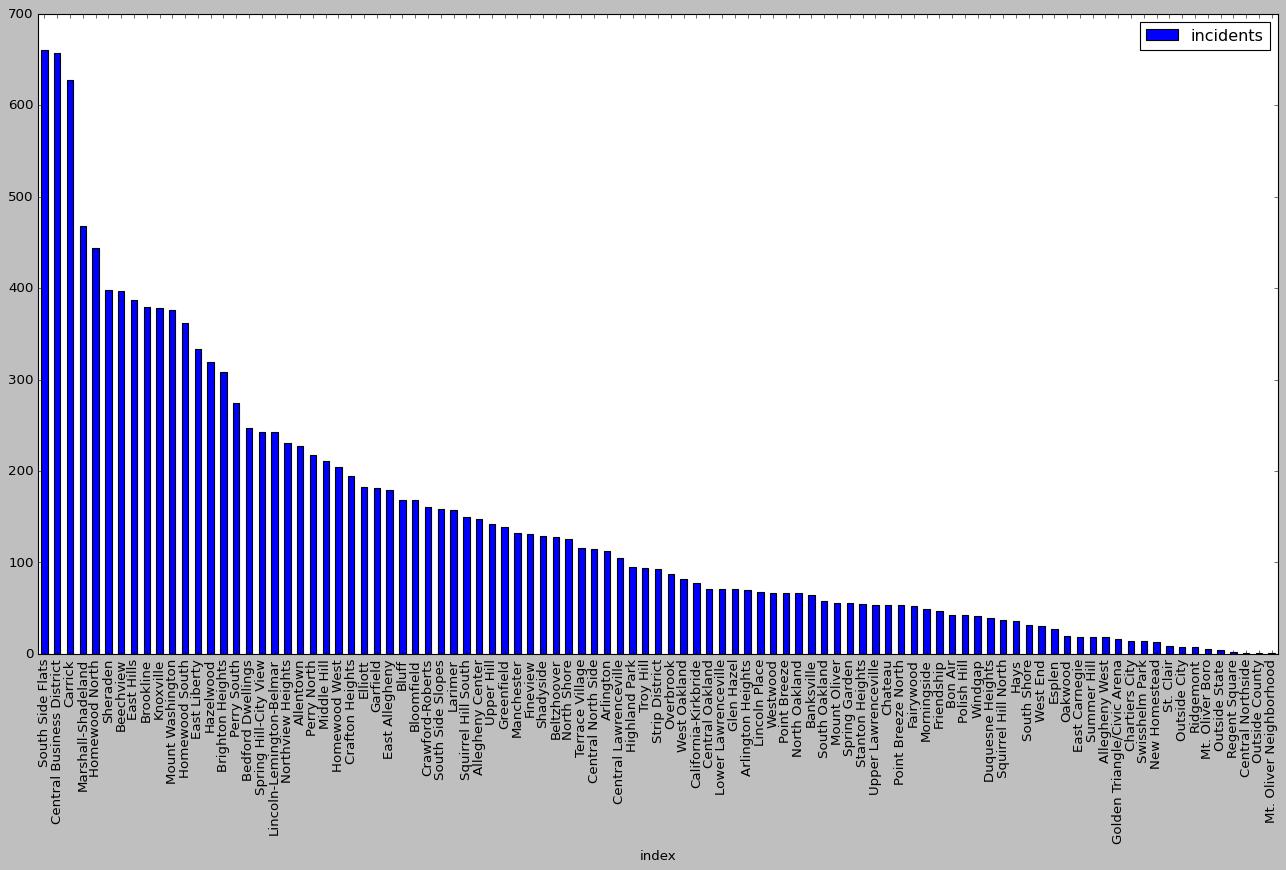

In [135]:
specific_crime.plot.bar(x = 'index', y='incidents', figsize=(20, 10))

We can see that there are three districts with higher child-related crime, but let's take this even further. Finally, I want to graph this data onto a map with geopandas! To do this, I will repeat a similar process as the mapping process above.

In [136]:
new_hood = neighborhoods.merge(specific_crime, how='left', left_on='hood', right_on="index")
new_hood = new_hood.dropna()
new_hood[['hood',"incidents",'geometry']].head()

,hood,incidents,geometry
0,Central Oakland,71.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,67.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,82.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,161.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,93.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


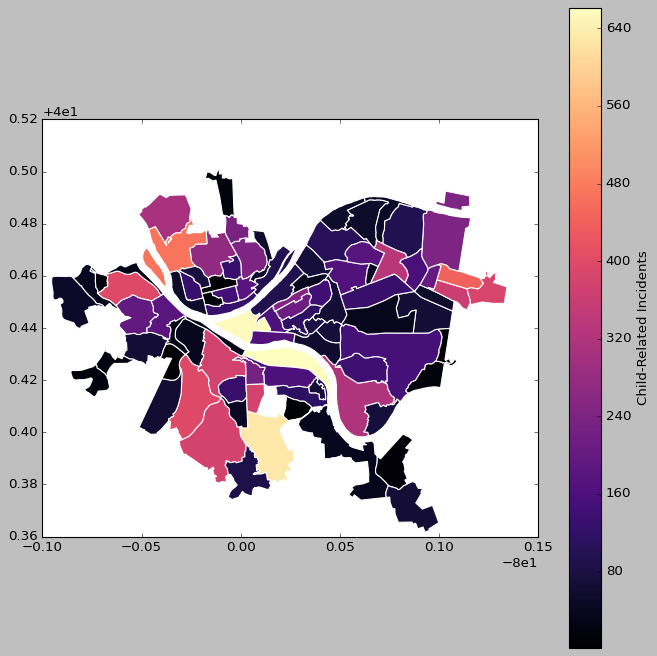

In [141]:
new_hood.plot(column='incidents', # data to be used for shading
               cmap='magma',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Child-Related Incidents"}, # legend label
               figsize=(10, 10),         # legend size
               )

It looks as though South Side Flats, Central Business District, and Carrick are also leading with the most specific crime. Now just for comparison, lets plot the overall crime and child-related crimed next to eachother and compare them.

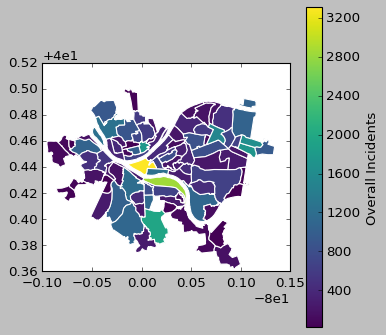

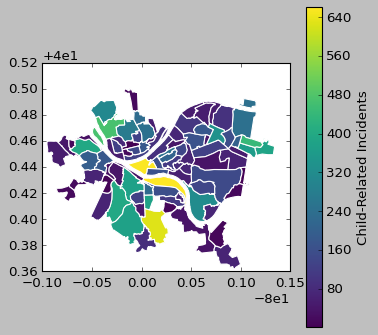

In [143]:
#Overall crime graph
hood.plot(column='incidents', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Overall Incidents"}, # legend label
               figsize=(5, 5),         # legend size
               )


#Child-related crime graph
new_hood.plot(column='incidents', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Child-Related Incidents"}, # legend label
               figsize=(5, 5),         # legend size
               )

Though the three leading neighborhoods are all still leading with crime, Carrick looks like it has a higher concentration of child-related crime than the other two leading neighborhoods.

#### In conclusion, the three neighborhoods that have a high amount of child related crime are South Side Flats, Central Business District, and Carrick, making these the worst places to raise a child in Pittsburgh in relation to criminal activity, making them the least safe. In addition, East Allegheny and Homewood South have a great amount of overall crime, not necessarily child-related crime. But it may be smart to avoid raising a child in these places as well, just to be safe.